In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp

In [3]:
### we can create an empty metadata table as follows. sample_IDs and file_names will be automatically collected

# fp.dt.create_empty_metadata("../../Tutorials/mouse_lineages")

In [4]:
### we can create an default panel table as follows. fcs_colnames and antigens will be automatically collected from the fcs file.
### if not antigens have been saved, we can add them manually without having to extract the channel names.

# fp.dt.create_panel_from_fcs("../../Tutorials/mouse_lineages")

In [5]:
panel = fp.dt.Panel("../../Tutorials/mouse_lineages/panel.csv")

In [6]:
metadata = fp.dt.Metadata("../../Tutorials/mouse_lineages/metadata.csv")

In [7]:
workspace = fp.dt.FlowJoWorkspace("../../Tutorials/mouse_lineages/lineages.wsp")

In [8]:
dataset = fp.create_dataset(input_directory = "../../Tutorials/mouse_lineages/",
                            panel = panel,
                            metadata = metadata,
                            workspace = workspace)

... gating sample 20112023_lineage_BM_Cre_neg_unstained_037.fcs
... gating sample 20112023_lineage_BM_Cre_pos_unstained_036.fcs
... gating sample 20112023_lineage_BM_M1_038.fcs
... gating sample 20112023_lineage_BM_M2_039.fcs
... gating sample 20112023_lineage_BM_M3_040.fcs
... gating sample 20112023_lineage_BM_M4_041.fcs
... gating sample 20112023_lineage_BM_M5_042.fcs
... gating sample 20112023_lineage_BM_M6_043.fcs
... gating sample 20112023_lineage_PB_Cre_neg_unstained_030.fcs
... gating sample 20112023_lineage_PB_Cre_pos_unstained_029.fcs
... gating sample 20112023_lineage_PB_M2_031.fcs
... gating sample 20112023_lineage_PB_M3_032.fcs
... gating sample 20112023_lineage_PB_M4_033.fcs
... gating sample 20112023_lineage_PB_M5_034.fcs
... gating sample 20112023_lineage_PB_M6_035.fcs
... gating sample 20112023_lineage_SPL_Cre_neg_unstained_045.fcs
... gating sample 20112023_lineage_SPL_Cre_pos_unstained_044.fcs
... gating sample 20112023_lineage_SPL_M1_046.fcs
... gating sample 2011202

In [9]:
dataset

AnnData object with n_obs × n_vars = 28113936 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash'
    obsm: 'gating'
    layers: 'compensated'

In [10]:
dataset.uns["metadata"].dataframe["staining"] = ["stained"
                                                 if not "unstained" in file_name else "stained"
                                                 for file_name in dataset.uns["metadata"].dataframe["file_name"].tolist()]


In [11]:
dataset.uns["metadata"].dataframe

,sample_ID,file_name,organ,genotype,sex,experiment,age,staining
0,1,20112023_lineage_BM_Cre_neg_unstained_037.fcs,BM,neg,m,1,95,stained
1,2,20112023_lineage_BM_Cre_pos_unstained_036.fcs,BM,pos,m,1,95,stained
2,3,20112023_lineage_BM_M1_038.fcs,BM,pos,f,1,95,stained
3,4,20112023_lineage_BM_M2_039.fcs,BM,neg,f,1,95,stained
4,5,20112023_lineage_BM_M3_040.fcs,BM,pos,f,1,95,stained
...,...,...,...,...,...,...,...,...
66,67,22112023_lineage_SPL_M14_020.fcs,SPL,pos,m,3,96,stained
67,68,22112023_lineage_SPL_M15_021.fcs,SPL,pos,m,3,96,stained
68,69,22112023_lineage_SPL_M16_022.fcs,SPL,neg,f,3,96,stained
69,70,22112023_lineage_SPL_M17_023.fcs,SPL,neg,f,3,96,stained


In [12]:
fp.add_metadata_to_obs(dataset,
                       metadata_column = "staining",
                       copy = False)
assert "staining" in dataset.obs.columns

In [13]:
fp.dt.calculate_cofactors(dataset)

... calculating cofactors
    ... sample 20112023_lineage_BM_Cre_neg_unstained_037.fcs
    ... sample 20112023_lineage_BM_Cre_pos_unstained_036.fcs
    ... sample 20112023_lineage_BM_M1_038.fcs
    ... sample 20112023_lineage_BM_M2_039.fcs
    ... sample 20112023_lineage_BM_M3_040.fcs
    ... sample 20112023_lineage_BM_M4_041.fcs
    ... sample 20112023_lineage_BM_M5_042.fcs
    ... sample 20112023_lineage_BM_M6_043.fcs
    ... sample 20112023_lineage_PB_Cre_neg_unstained_030.fcs
    ... sample 20112023_lineage_PB_Cre_pos_unstained_029.fcs
    ... sample 20112023_lineage_PB_M2_031.fcs
    ... sample 20112023_lineage_PB_M3_032.fcs
    ... sample 20112023_lineage_PB_M4_033.fcs
    ... sample 20112023_lineage_PB_M5_034.fcs
    ... sample 20112023_lineage_PB_M6_035.fcs
    ... sample 20112023_lineage_SPL_Cre_neg_unstained_045.fcs
    ... sample 20112023_lineage_SPL_Cre_pos_unstained_044.fcs
    ... sample 20112023_lineage_SPL_M1_046.fcs
    ... sample 20112023_lineage_SPL_M2_047.fcs
    ..

In [14]:
dataset.uns["cofactors"]

CofactorTable(13 channels, loaded as provided dataframe)

In [15]:
calculated_cofactors = dataset.uns["cofactors"]

In [16]:
cofactors = fp.dt.CofactorTable("../../Tutorials/mouse_lineages/cofactors.csv")
cofactors.dataframe

,fcs_colname,cofactors
0,GFP,300
1,B220,1000
2,CD4,1000
3,Siglec-F,700
4,CD8,2000
5,Ly6C,800
6,NK1.1,800
7,CD11b,400
8,Ly6G,1000
9,DAPI,3000


In [17]:
fp.dt.transform(dataset,
                transform = "asinh",
                cofactor_table = calculated_cofactors,
                key_added = "transformed",
                layer = "compensated")

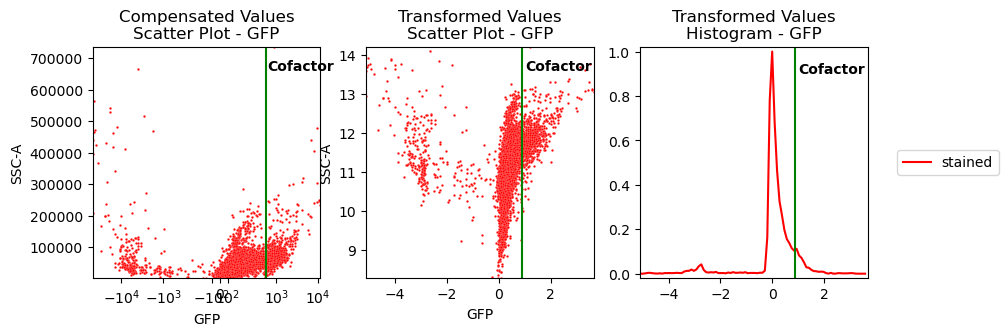

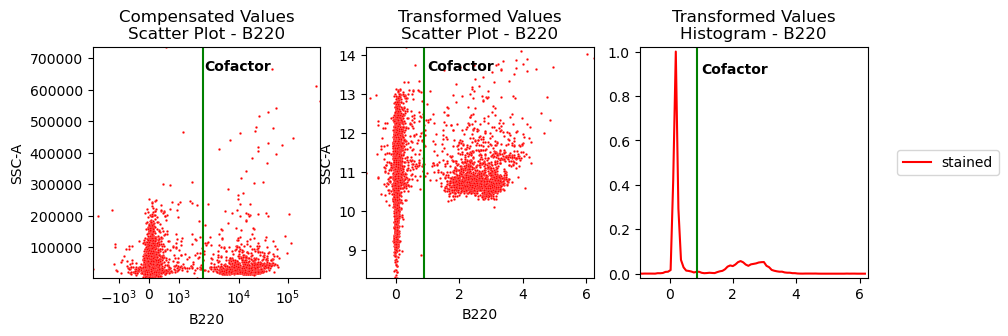

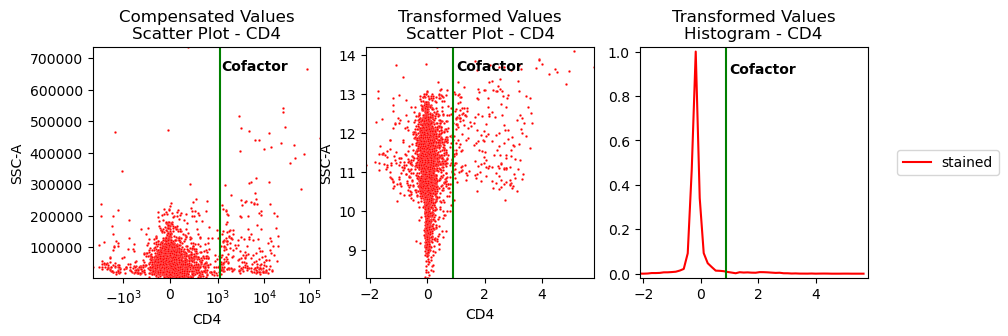

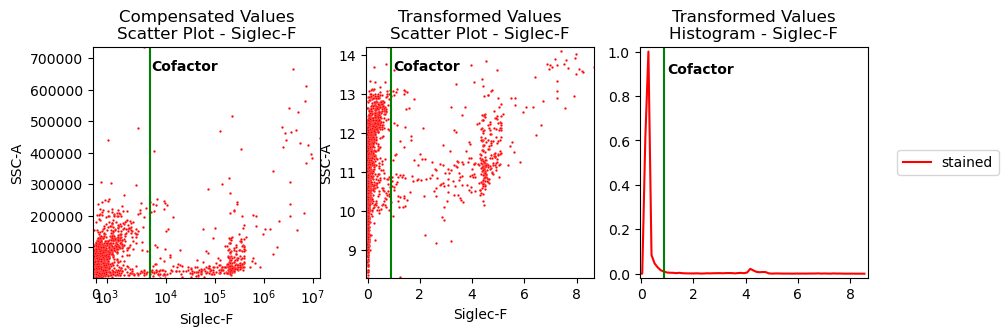

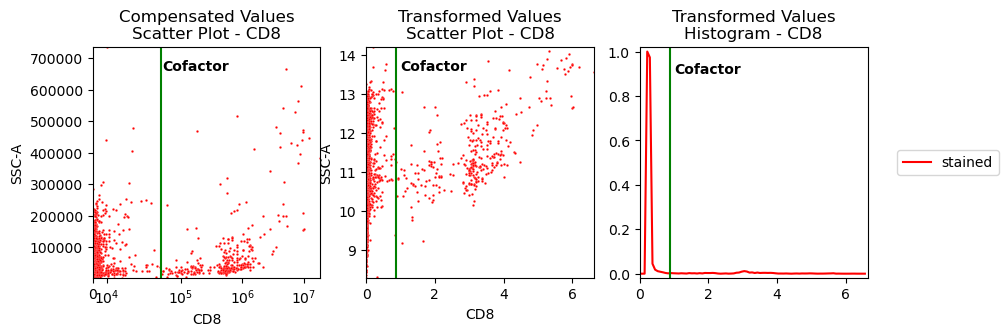

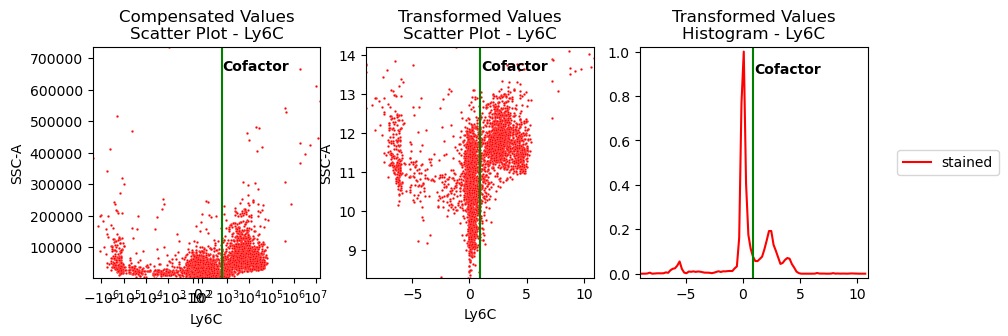

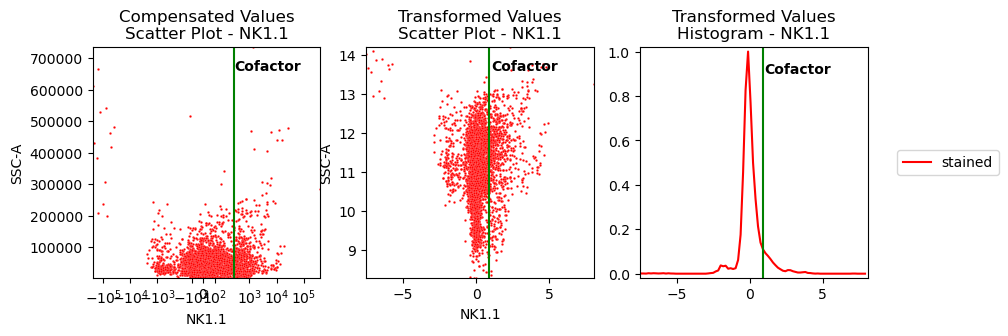

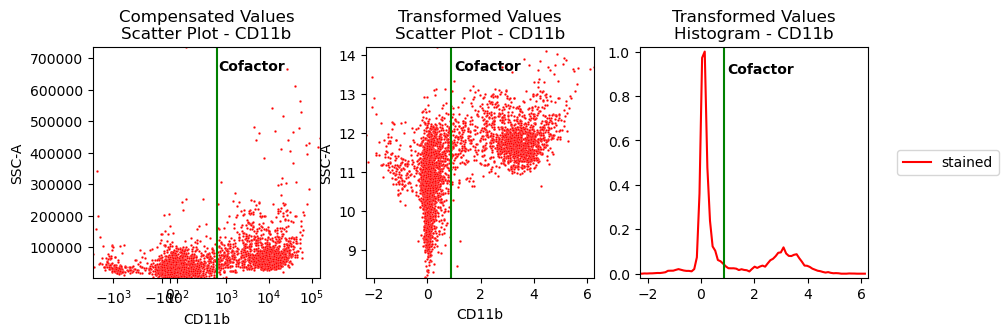

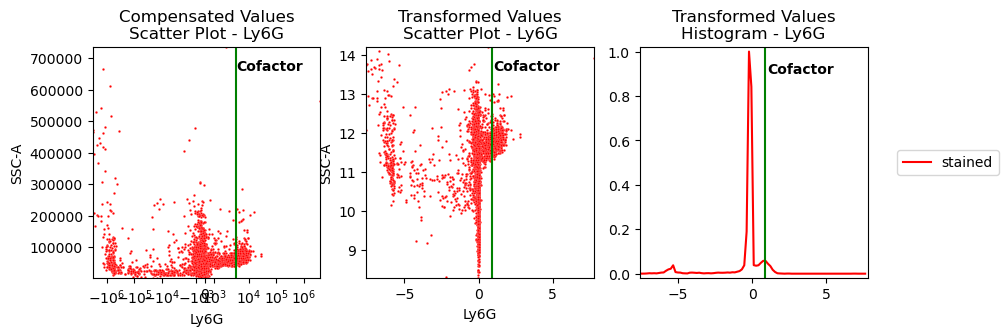

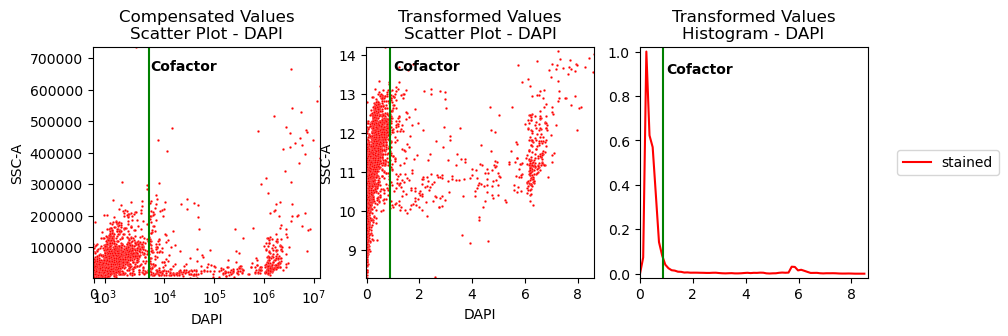

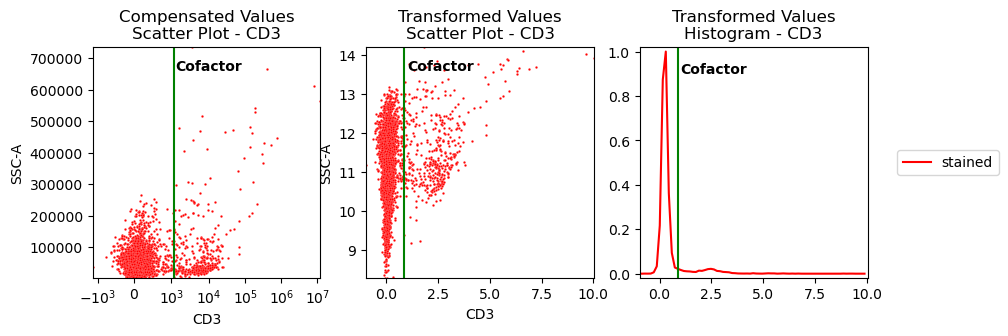

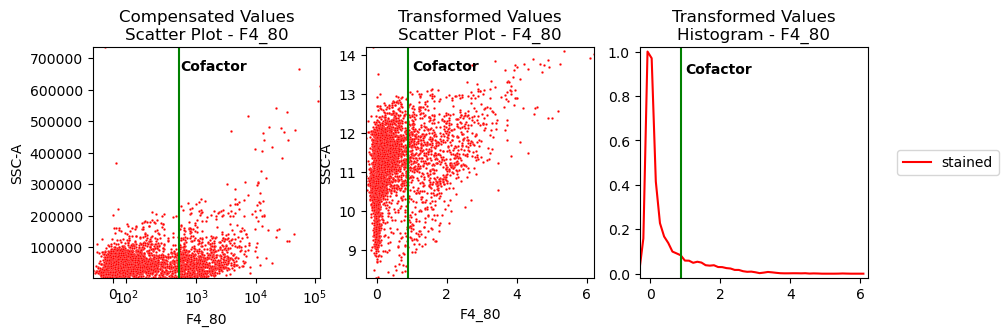

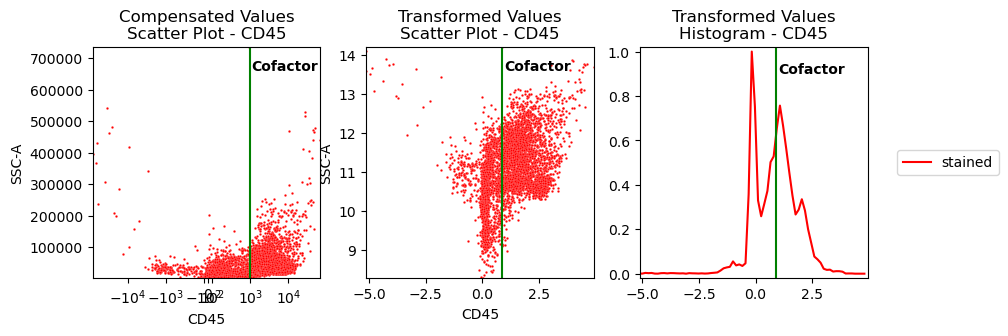

In [18]:
### for bone_marrow

for marker in dataset.var_names:
    if not fp.is_fluo_channel(dataset, marker):
        continue
    fp.pl.transformation_plot(dataset,
                              sample_identifier = "3",
                              marker = marker)

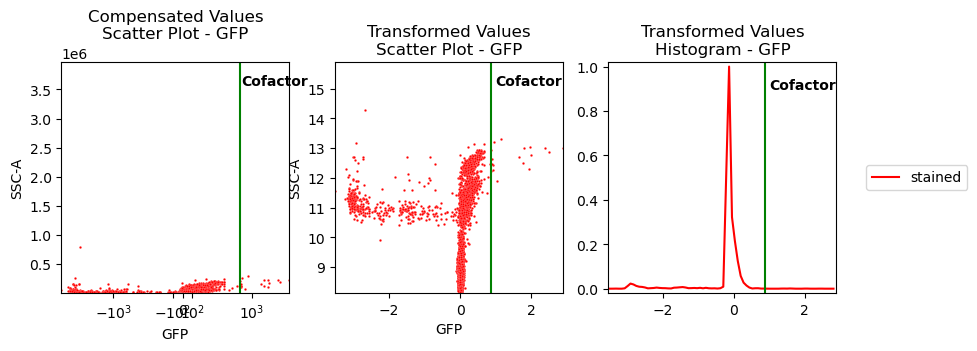

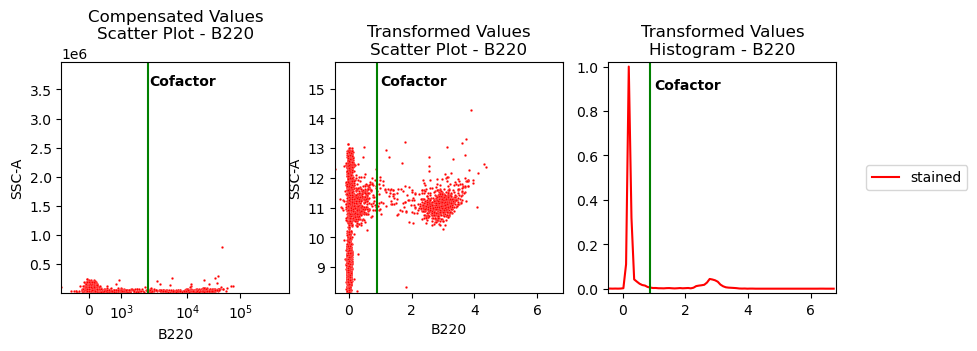

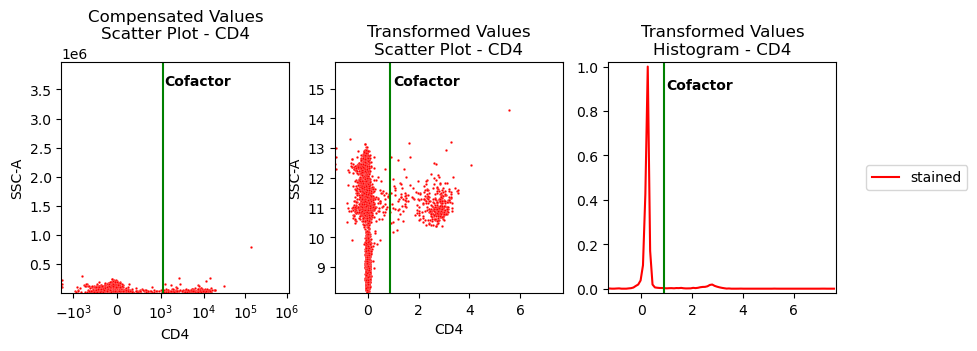

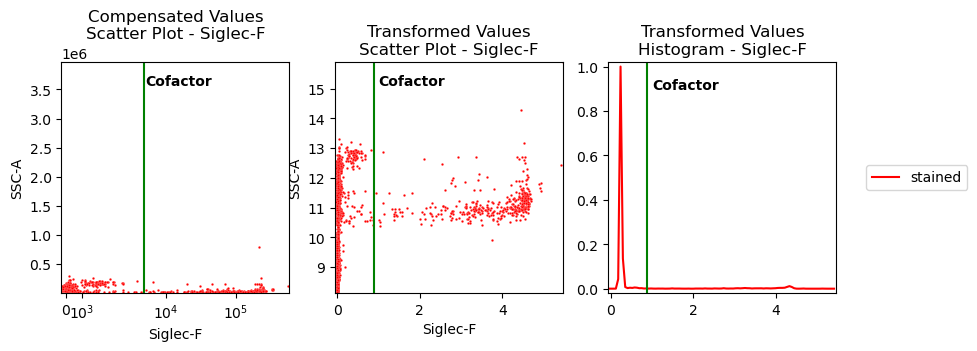

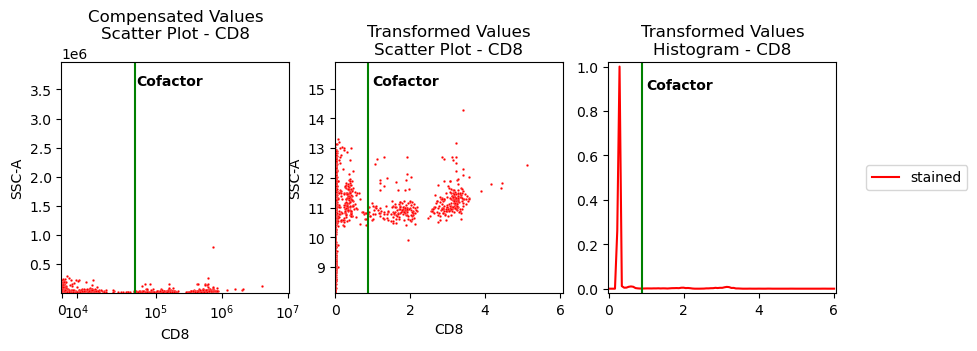

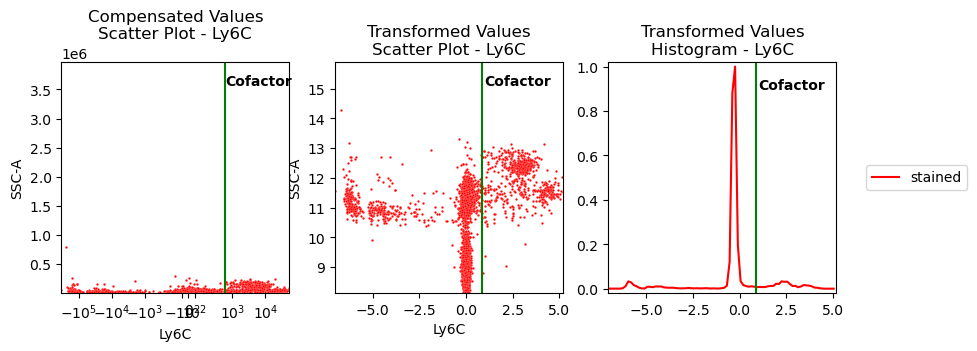

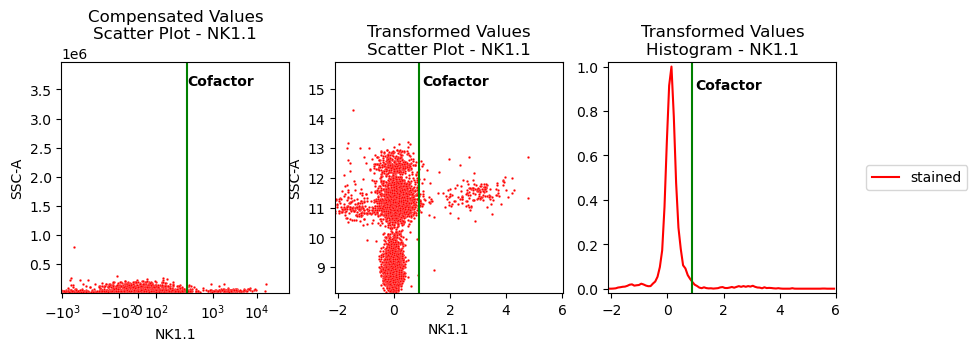

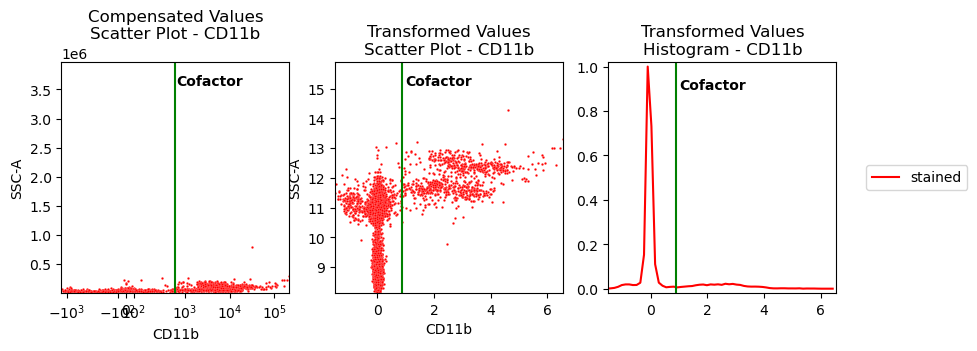

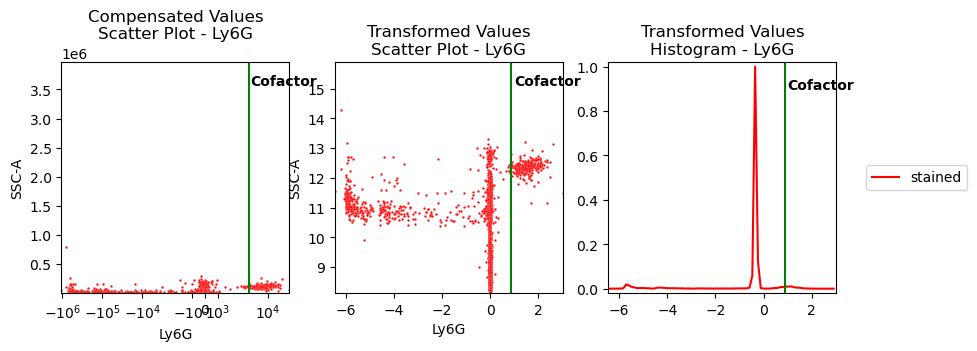

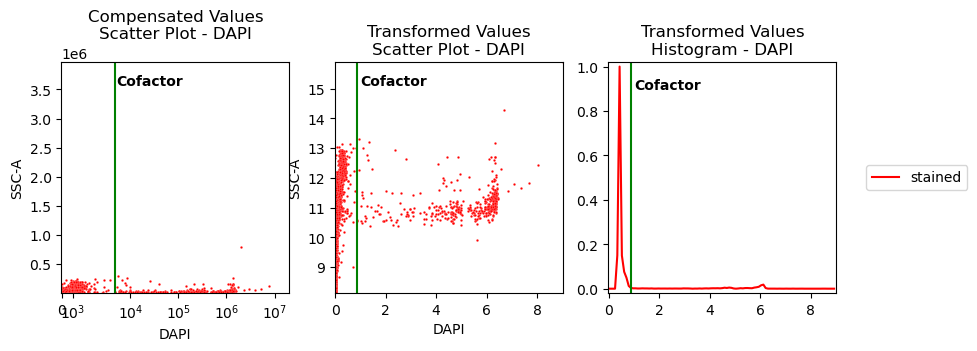

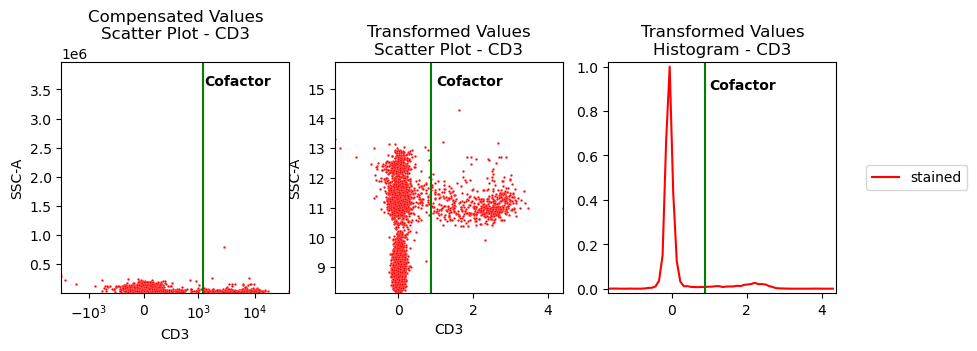

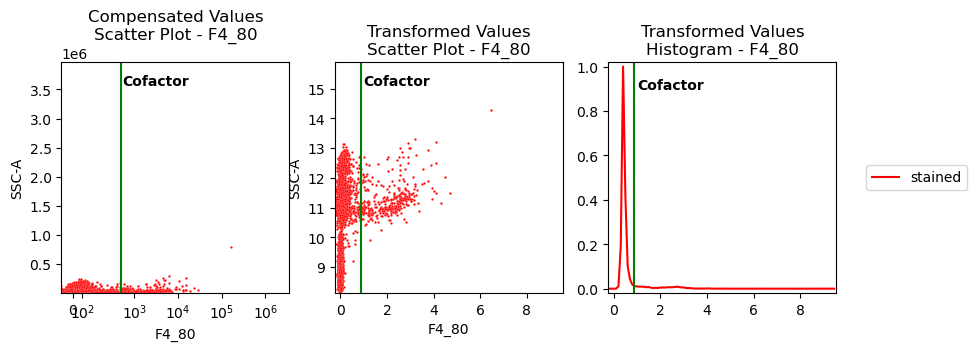

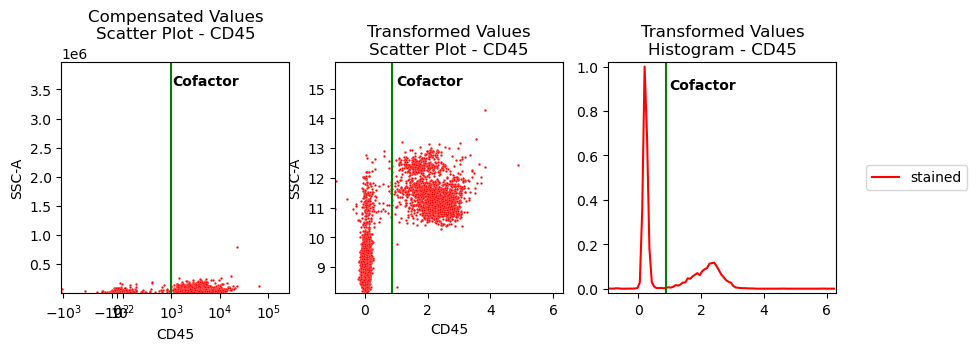

In [19]:
### for PB

for marker in dataset.var_names:
    if not fp.is_fluo_channel(dataset, marker):
        continue
    fp.pl.transformation_plot(dataset,
                              sample_identifier = "11",
                              marker = marker)

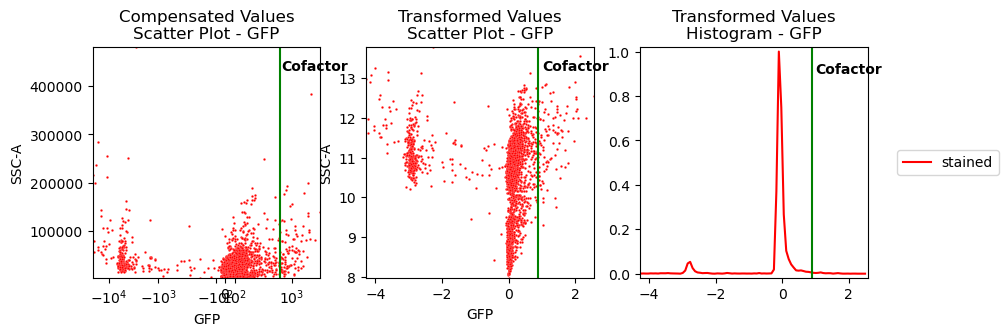

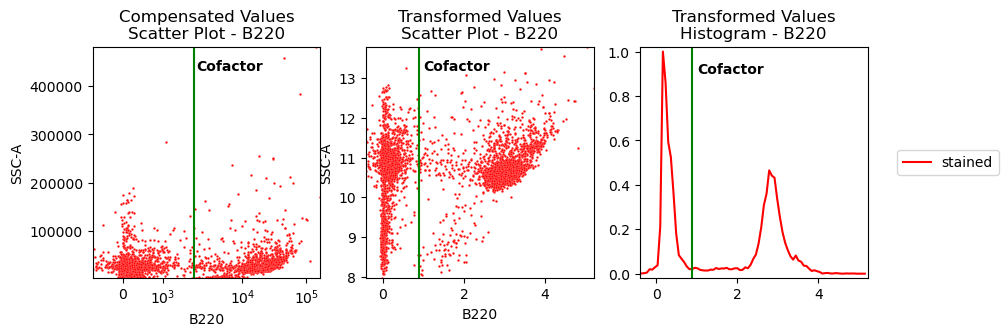

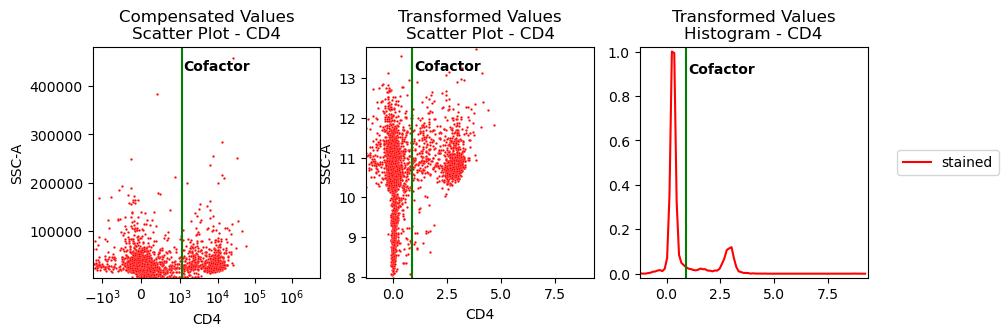

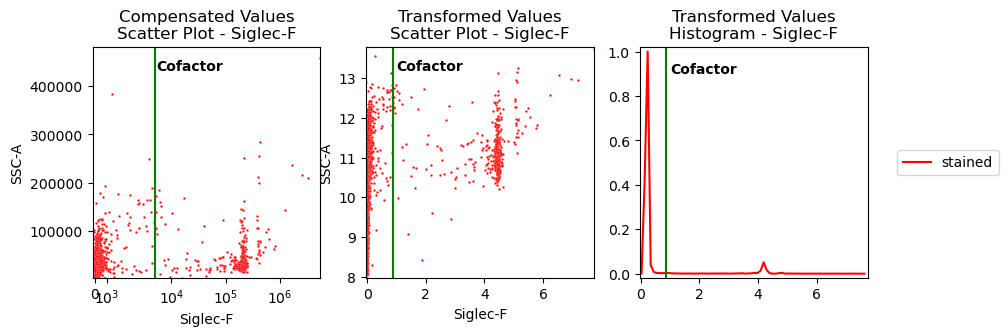

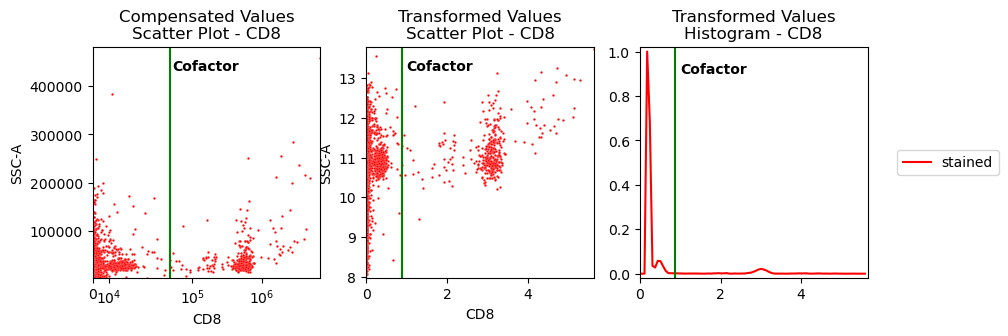

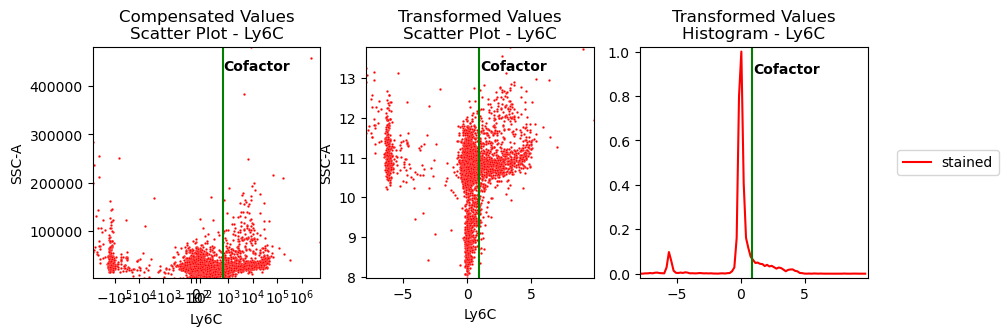

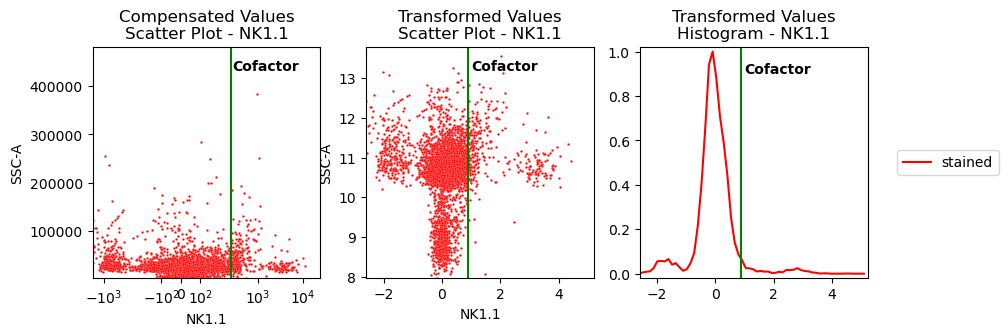

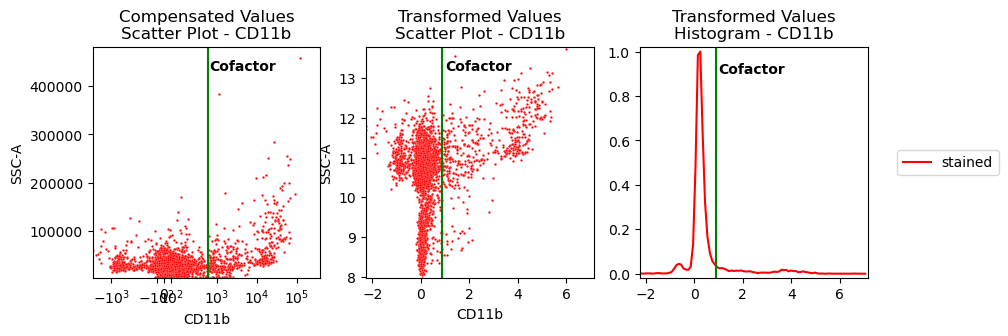

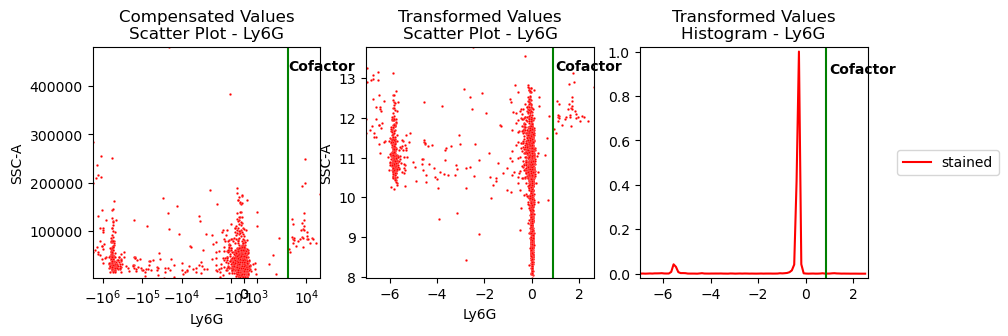

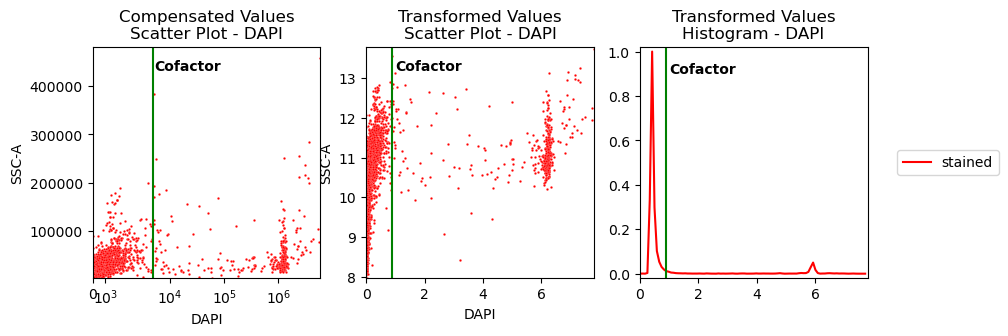

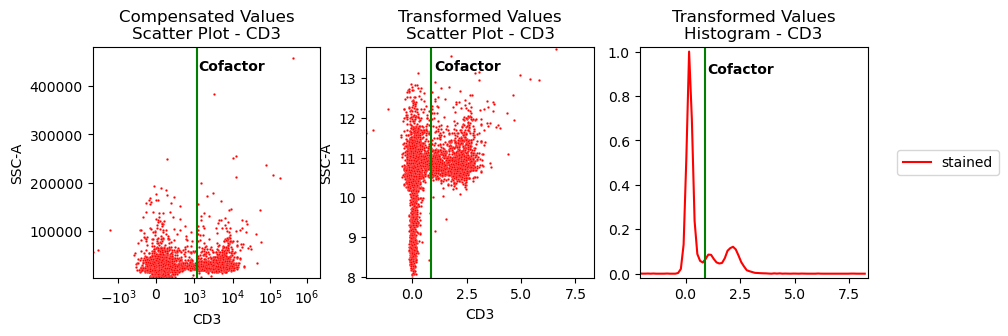

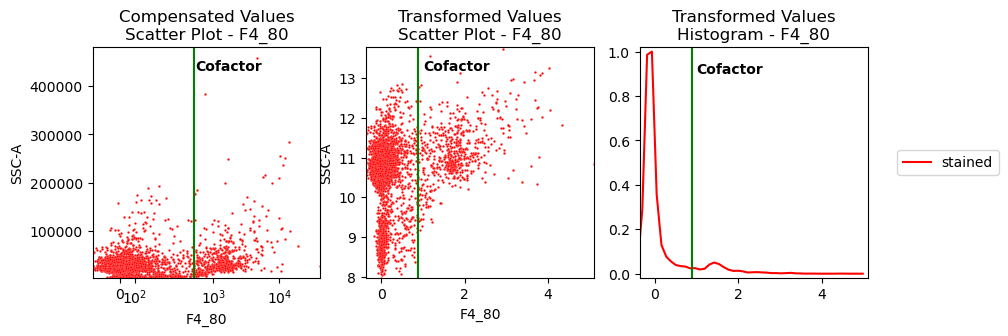

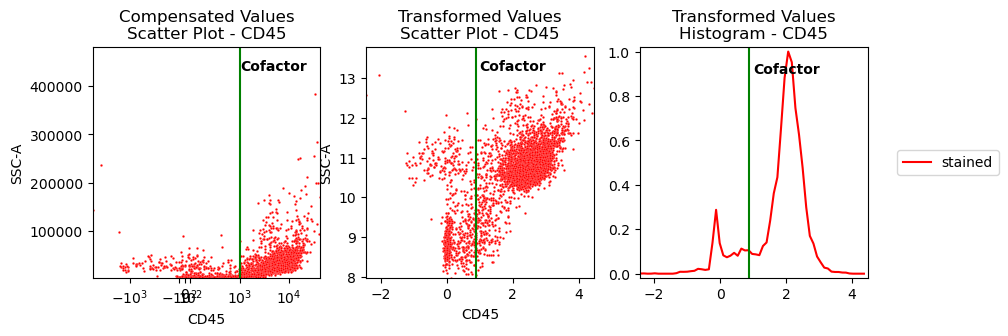

In [20]:
### for spleen

for marker in dataset.var_names:
    if not fp.is_fluo_channel(dataset, marker):
        continue
    fp.pl.transformation_plot(dataset,
                              sample_identifier = "19",
                              marker = marker)

In [21]:
### the calculated CD8 cofactor is way too high, caused by a small but very fluorescent population. We set it manually
dataset.uns["cofactors"].set_cofactor("CD8", 2000)
### the cofactor for CD3 might be a little bit too conservative, so we set it to 500
dataset.uns["cofactors"].set_cofactor("CD3", 500)

dataset.uns["cofactors"].set_cofactor("NK1.1", 900)

In [22]:
fp.dt.transform(dataset,
                transform = "asinh",
                cofactor_table = dataset.uns["cofactors"],
                key_added = "transformed",
                layer = "compensated")

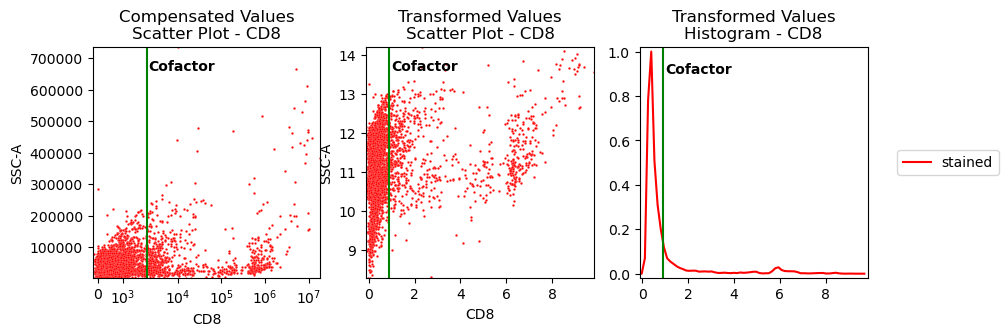

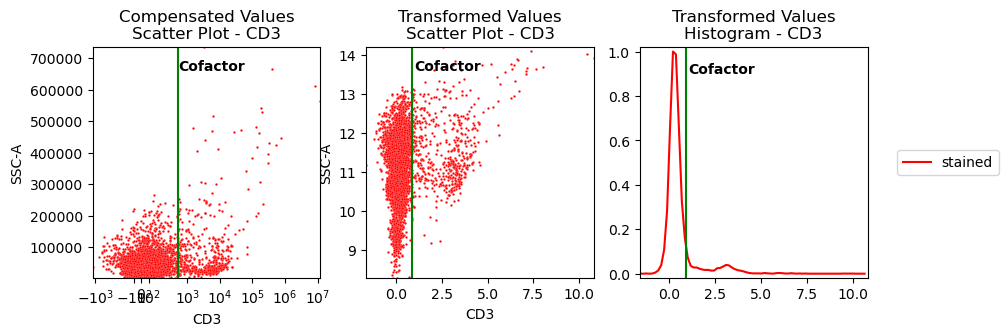

In [23]:
fp.pl.transformation_plot(dataset,
                          sample_identifier = "3",
                          marker = "CD8")
fp.pl.transformation_plot(dataset,
                          sample_identifier = "3",
                          marker = "CD3")

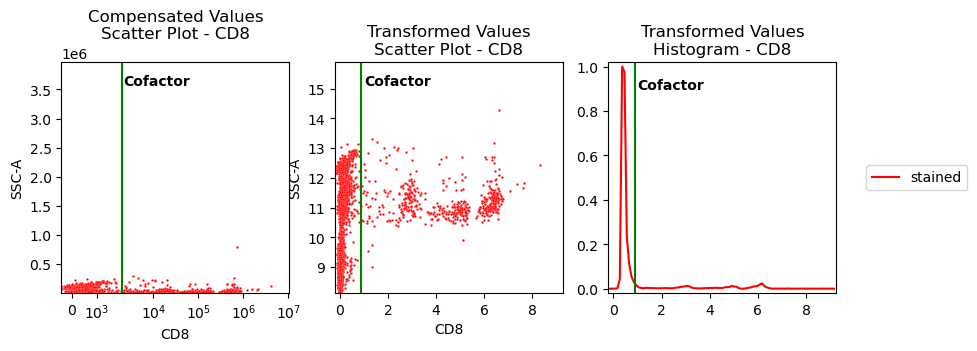

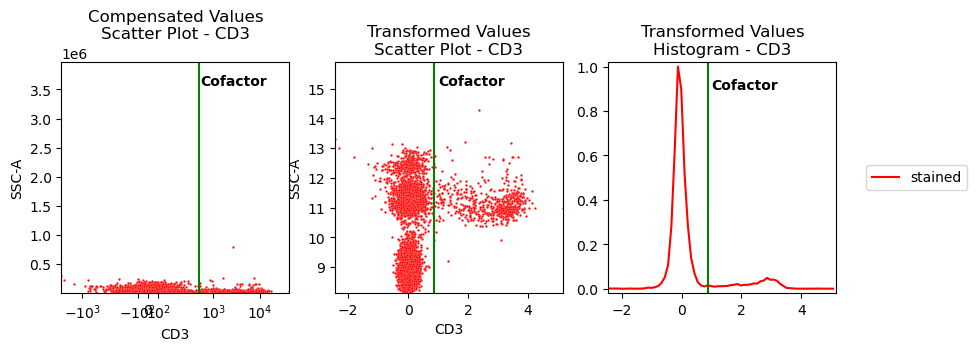

In [24]:
fp.pl.transformation_plot(dataset,
                          sample_identifier = "11",
                          marker = "CD8")
fp.pl.transformation_plot(dataset,
                          sample_identifier = "11",
                          marker = "CD3")

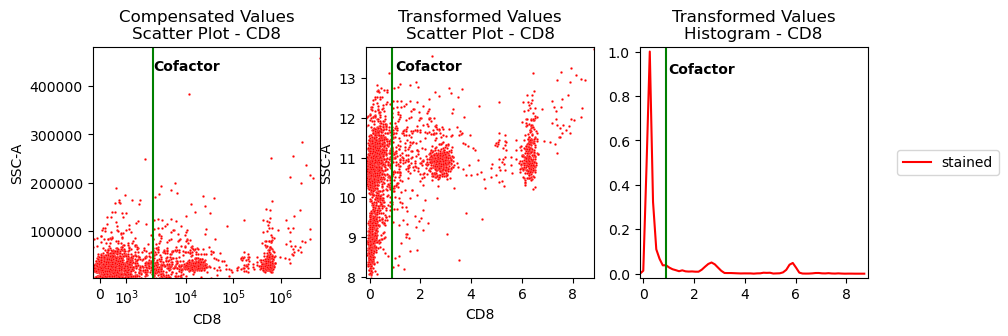

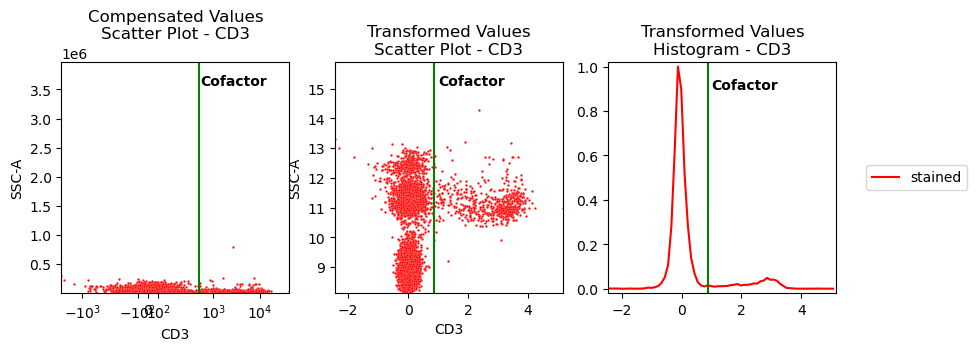

In [25]:
fp.pl.transformation_plot(dataset,
                          sample_identifier = "19",
                          marker = "CD8")
fp.pl.transformation_plot(dataset,
                          sample_identifier = "11",
                          marker = "CD3")

In [26]:
dataset

AnnData object with n_obs × n_vars = 28113936 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

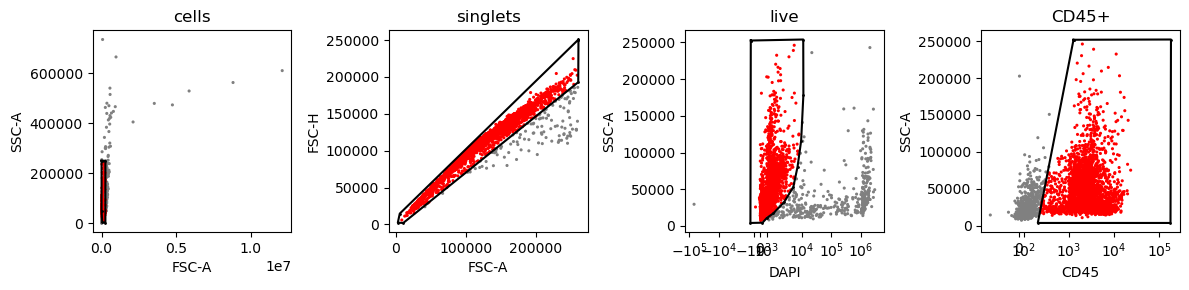

In [27]:
fp.pl.gating_strategy(dataset,
                      sample_ID = "3",
                      wsp_group = "bone_marrow")

In [28]:
dataset

AnnData object with n_obs × n_vars = 28113936 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [29]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/mouse_lineages",
                file_name = "raw_dataset",
                overwrite = True)

File saved successfully
